In [2]:
import requests
import pandas as pd
iss_record = True
if iss_record == True:
    import datetime
    iss_date = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

    import time
    iss_start=time.time()

    iss_data = []
    while True: 
        r = requests.get(url='http://api.open-notify.org/iss-now.json')
        iss_location = (r.json())
        print(iss_location)

        iss_data.append([iss_location['timestamp'],
                                iss_location['iss_position']['latitude'],
                                iss_location['iss_position']['longitude']
                                ])

        iss_data_df = pd.DataFrame(iss_data, columns=['timestamp','latitude', 'longitude',])
        iss_data_df.to_csv('ISS_location_' + iss_date + '.csv', index=None)
        
        if len(iss_data) > 100:
            break
            
        time.sleep(10) 

{'timestamp': 1658054681, 'iss_position': {'latitude': '37.2929', 'longitude': '-126.8053'}, 'message': 'success'}
{'timestamp': 1658054691, 'iss_position': {'latitude': '36.8656', 'longitude': '-126.1861'}, 'message': 'success'}
{'timestamp': 1658054702, 'iss_position': {'latitude': '36.4347', 'longitude': '-125.5744'}, 'message': 'success'}
{'timestamp': 1658054712, 'iss_position': {'latitude': '36.0001', 'longitude': '-124.9697'}, 'message': 'success'}
{'timestamp': 1658054723, 'iss_position': {'latitude': '35.5621', 'longitude': '-124.3722'}, 'message': 'success'}
{'timestamp': 1658054733, 'iss_position': {'latitude': '35.1418', 'longitude': '-123.8098'}, 'message': 'success'}
{'timestamp': 1658054743, 'iss_position': {'latitude': '34.6974', 'longitude': '-123.2260'}, 'message': 'success'}
{'timestamp': 1658054754, 'iss_position': {'latitude': '34.2498', 'longitude': '-122.6490'}, 'message': 'success'}
{'timestamp': 1658054764, 'iss_position': {'latitude': '33.8207', 'longitude': '

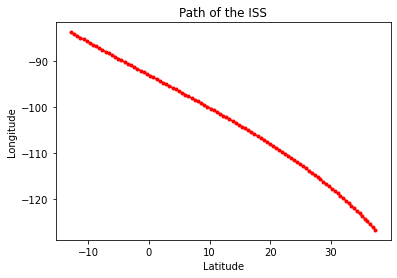

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iss_plot= pd.read_csv('ISS_location_20220717184441.csv')
plt.plot(iss_plot.latitude, iss_plot.longitude, 'r.-')
plt.title('Path of the ISS')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()